In [ ]:
## Clean and summary statistics
import pandas as pd

url= "https://raw.githubusercontent.com/shane-221/100_days_of_python/refs/heads/main/73_Day_73_Data%20Visualisation/QueryResults.csv"
# Getting the library
dataset= pd.read_csv(url,  names = ["Date", "Tag", "Post"], header= 0)

# Removing the missing values
dataset = dataset.dropna()


# Just Extra stuff
dataset.head()      ## Looking at the first few lines
dataset.tail()      ## Looking at the last few line s
dataset.columns
dataset.shape
dataset.count()



,0
Date,1991
Tag,1991
Post,1991


In [ ]:
#Which languaghe has  the most number of posts since the creation of stack overflow ?
dataset.groupby("Tag")[["Post"]].sum()


#Can we count how many months of post exist for each programming language?
dataset.groupby("Tag")[["Date", "Post"]].count()

,Date,Post
Tag,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [ ]:
# # Selecting individual cells
# dataset["Date"]
#
# # Changing how we see the data
# type(dataset["Date"][1])    ## Tells you  that its a string
dataset["Date"] =pd.to_datetime(dataset["Date"])



dataset.head()

,Date,Tag,Post
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [ ]:
# Can Change the shape of the  dataset to show different categories
pivoted_dataset =  dataset.pivot(columns="Tag", values="Post", index="Date")
print(pivoted_dataset)

Tag         assembly       c       c#     c++  delphi     go     java  \
Date                                                                    
2008-07-01       NaN     NaN      3.0     NaN     NaN    NaN      NaN   
2008-08-01       8.0    85.0    511.0   164.0    14.0    NaN    222.0   
2008-09-01      28.0   321.0   1649.0   755.0   105.0    NaN   1137.0   
2008-10-01      15.0   303.0   1989.0   811.0   112.0    NaN   1153.0   
2008-11-01      17.0   259.0   1730.0   735.0   141.0    NaN    958.0   
...              ...     ...      ...     ...     ...    ...      ...   
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

Tag         javascript   perl     php   python    

In [ ]:
  # Substituting 0 for each of the NaN values
pivoted_dataset.fillna(0, inplace = True)

# Checking to see if there are any values that are na:
pivoted_dataset.isna().values.any()

np.False_

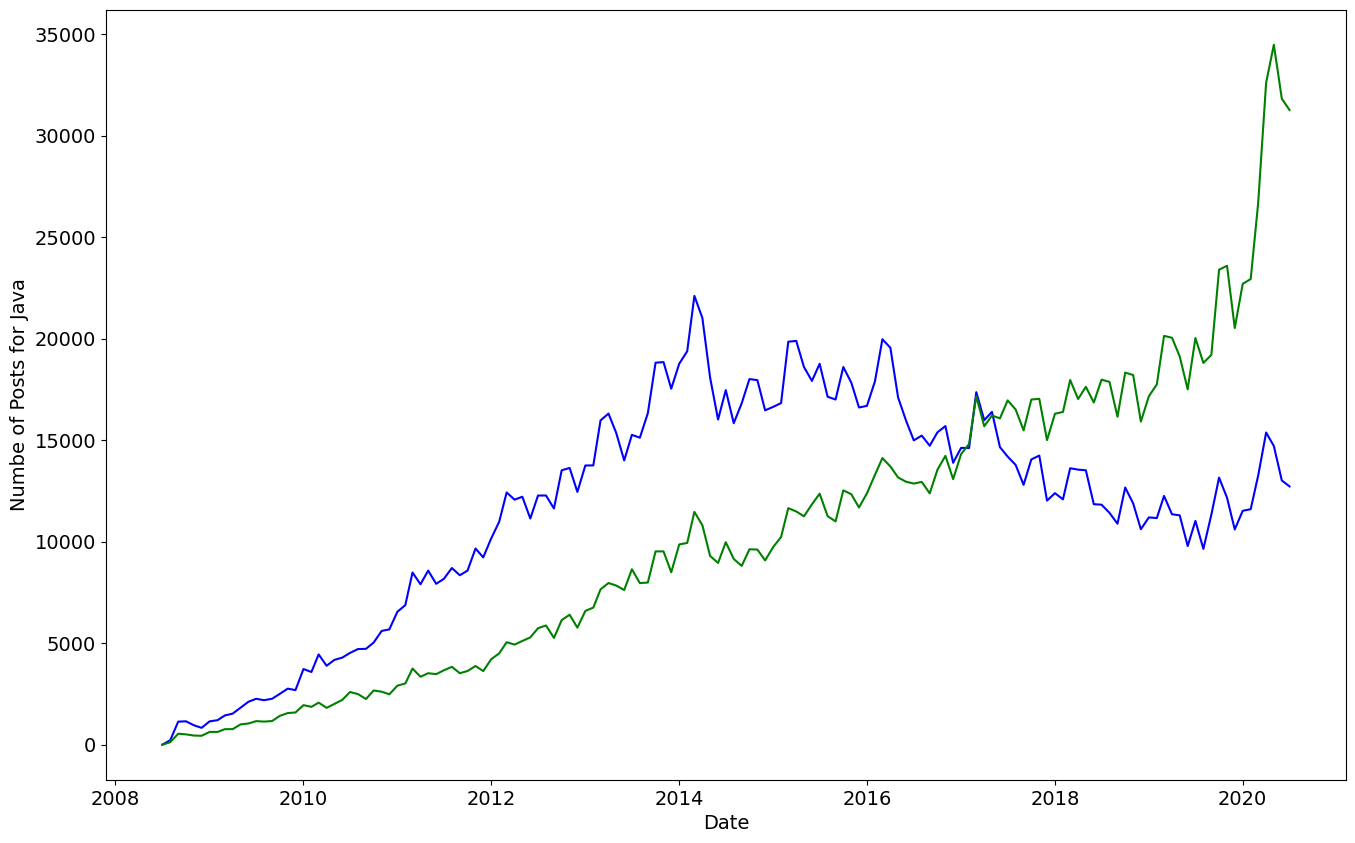

In [ ]:
# Using Matplotlib to plot the graph with panda:
import matplotlib.pyplot as plt

      # Setting the shape of the graph
plt.figure( figsize= (16, 10))
      # Fontsize of the x and y values
plt.xticks(fontsize= 14)
plt.yticks(fontsize =14)
      # Building the Pivot table
plt.plot(pivoted_dataset.index,  pivoted_dataset["java"], "b")

      # Adding x and Y label with limits
plt.xlabel("Date", fontsize=14)
plt.ylabel("Numbe of Posts for Java", fontsize=14)


      # Plotting Python next to it
plt.plot(pivoted_dataset.index, pivoted_dataset["python"], "g")






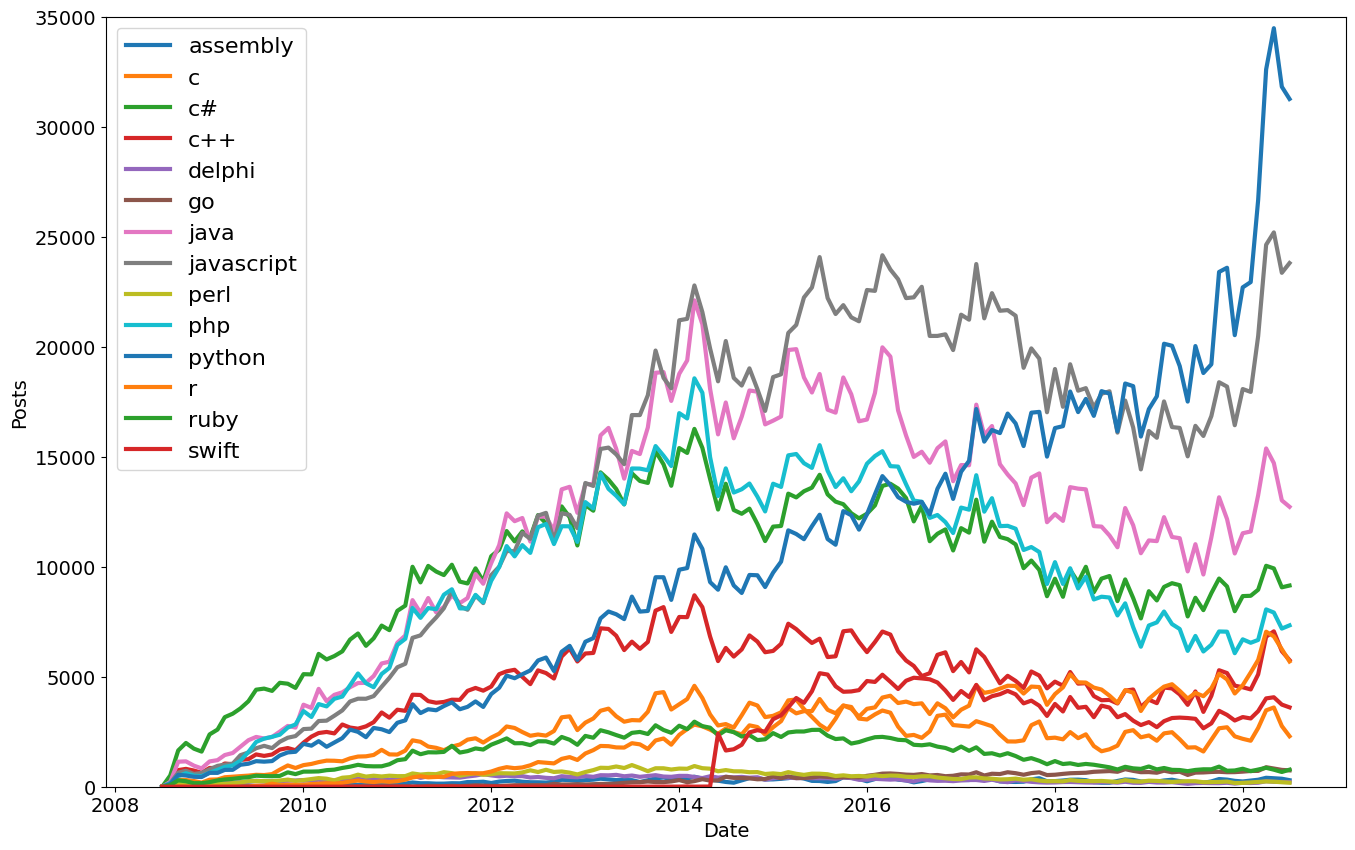

In [ ]:
# What if we wanted top plot all the programming lamguages? You can just ran a for loop:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Posts", fontsize =14)
plt.ylim(0,35000)

# Need to adjust the x values to make it readbale:



for column in pivoted_dataset.columns:
  plt.plot(pivoted_dataset.index,
           pivoted_dataset[column],
           linewidth =3,
           label = pivoted_dataset[column].name )
      # It automaticallyt changes the colour for them
plt.legend(fontsize=16)

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', name='Date', length=145, freq=None)


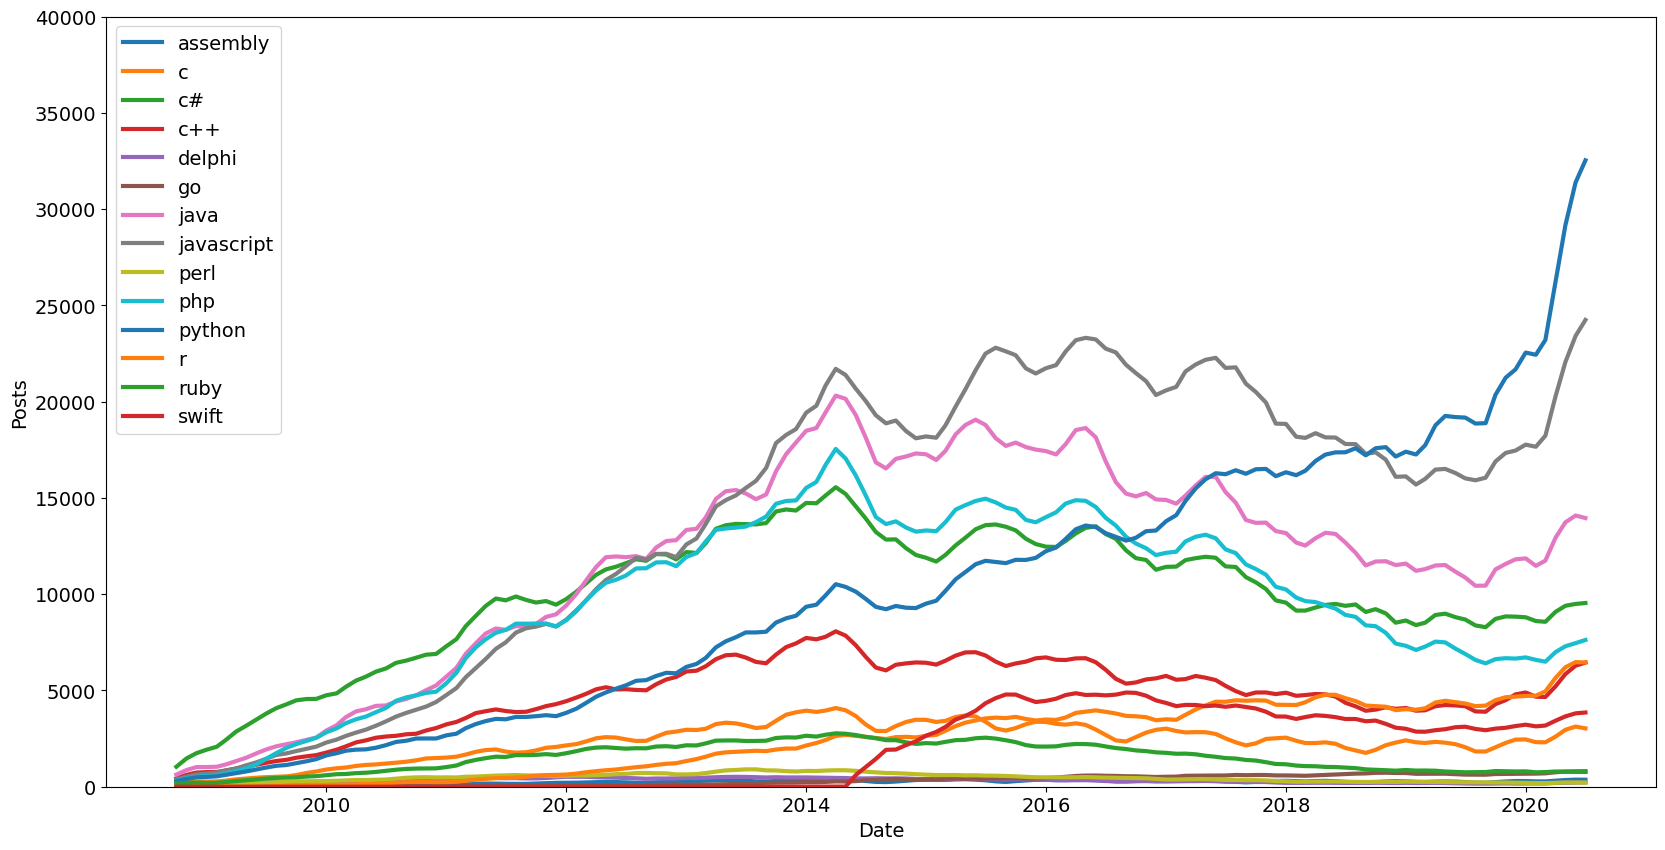

In [ ]:
# Time series data can eb noisy with lots of spikes. So we can smooth out the data:
  # You can take a rolling mean -- this is where we afverage 6 to 12 of the numbers. Use the rolling() and mean() functions.


roll_df = pivoted_dataset.rolling(window=4).mean()
print(roll_df.index)
# Get the size of the figure:
plt.figure(figsize=(20, 10))

# Control the size of the x and Y ticks:
plt.xticks(fontsize=14)
plt.yticks(fontsize= 14)

# Control the labels:
plt.xlabel("Date", fontsize= 14)
plt.ylabel("Posts", fontsize = 14)

# X and Y limits:
plt.ylim(0,40000)

# Fopr loop for the actual graph
for column in roll_df.columns:
  plt.plot(roll_df.index,
          roll_df[column],
          linewidth =3,
          label = roll_df[column].name )
    # The legend sizing
plt.legend(fontsize= 14)